In [269]:
import numpy as np
import pandas as pd

In [270]:
# load data
survey_data=pd.read_csv('Topic_Survey_Assignment.csv', index_col=0)
survey_data

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [271]:
# calcualte total respondents for each topic
survey_data['Total']=survey_data.sum(axis=1)
survey_data['Total']

Big Data (Spark / Hadoop)     2188
Data Analysis / Statistics    2192
Data Journalism               2120
Data Visualization            2176
Deep Learning                 2169
Machine Learning              2180
Name: Total, dtype: int64

In [272]:
survey_data

,Very interested,Somewhat interested,Not interested,Total
Big Data (Spark / Hadoop),1332,729,127,2188
Data Analysis / Statistics,1688,444,60,2192
Data Journalism,429,1081,610,2120
Data Visualization,1340,734,102,2176
Deep Learning,1263,770,136,2169
Machine Learning,1629,477,74,2180


In [273]:
# calculate percentage and round up to 2 decimals
survey_data['Very interested']=np.round(survey_data['Very interested']/survey_data['Total'],2)
survey_data['Somewhat interested']=np.round(survey_data['Somewhat interested']/survey_data['Total'],2)
survey_data['Not interested']=np.round(survey_data['Not interested']/survey_data['Total'],2)

As for the chart:

~use a figure size of (20, 8),

~bar width of 0.8,

~use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,

~use font size 14 for the bar labels, percentages, and legend,

~use font size 16 for the title, and, display the percentages above the bars as shown above, and remove the left, top, and right borders.

In [276]:

survey_data.sort_values(by='Very interested', ascending=False).iloc[0].drop('Total')

Very interested        0.77
Somewhat interested    0.20
Not interested         0.03
Name: Data Analysis / Statistics, dtype: float64

In [277]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

/Users/yunpeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


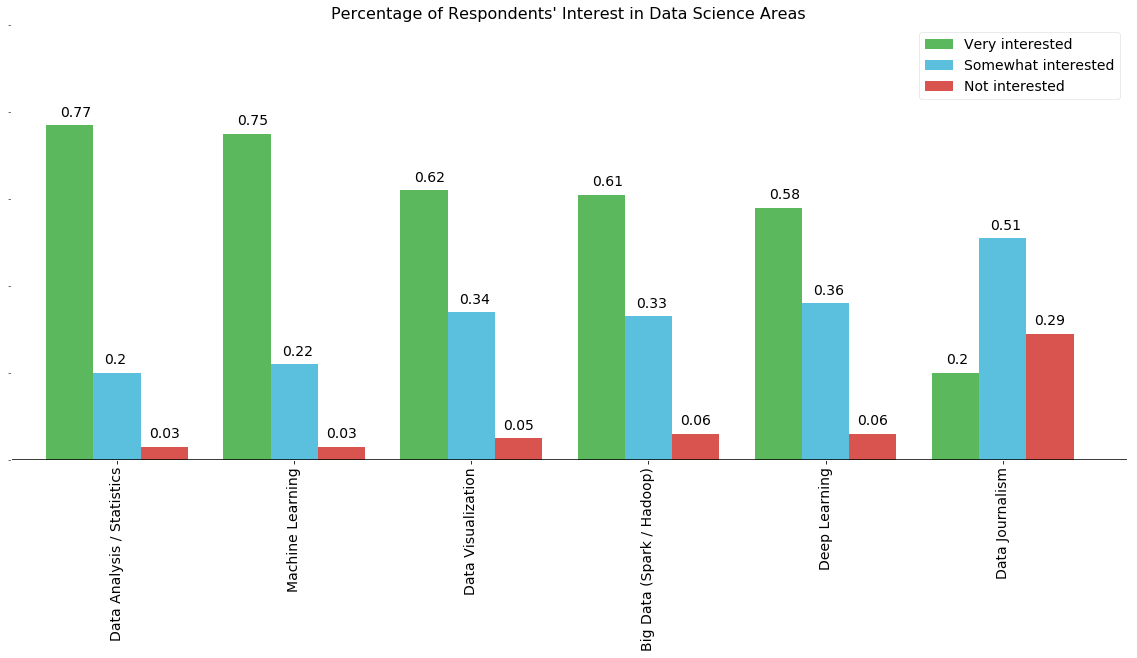

In [302]:
# plot data with percentage
columns=['Very interested', 'Somewhat interested', 'Not interested']

# use artist layer
ax=survey_data[columns].sort_values(by='Very interested', ascending=False).plot(kind='bar', 
                          figsize=(20, 8),
                         width=0.8,
                         color=['#5cb85c', '#5bc0de', '#d9534f'])
ax.set_ylim(0,1)
ax.set_xlim(-0.6,5.7)
ax.set_title('Percentage of Respondents\' Interest in Data Science Areas', fontdict = {'fontsize' : 16}) # change the font size of the title
ax.legend(fontsize=14, facecolor='white') # change the font size of the legend
ax.tick_params(axis="x", labelsize=14) # change the font size of the x axix label

# remove the left, top, and right borders; make sure the color of x axix labels is black
ax.set_axis_bgcolor('white') # change background to white
ax.set_yticklabels([]) # turn off y ticks
ax.axhline(0, color='black') # draw an x axix line 
ax.tick_params(axis='x', colors='black') # make sure the color of x axix labels is black

# Add percentage numbers over the bars
r=0
for i in range(0,6):
    for index, value in enumerate(survey_data.sort_values(by='Very interested', ascending=False).iloc[i].drop('Total')):
        #print(index, value)
        label=format(value)
        #print(index/5, value+0.02)
        ax.annotate(label, xy=(index/4-0.32+r, value+0.02), color='black', fontsize=14)
    r=r+1

plt.show()